In [50]:
import geopandas as gpd
from shapely.ops import linemerge
from shapely.wkt import loads
from shapely.geometry import LineString

-----point file-----

In [45]:
df_point = gpd.read_file('hydrant_location/hydrant_location.shp')

In [48]:
df_point['id'] = df_point.reset_index().index

In [49]:
df_point

,id,geometry
0,0,POINT (-74.00698 40.74748)
1,1,POINT (-74.00722 40.74722)
2,2,POINT (-74.00721 40.74697)
3,3,POINT (-74.00722 40.74722)
4,4,POINT (-74.00728 40.74667)
...,...,...
2295,2295,POINT (-73.97976 40.71559)
2296,2296,POINT (-73.97987 40.71361)
2297,2297,POINT (-73.98387 40.72077)
2298,2298,POINT (-73.97780 40.71833)


-----road file-----

In [17]:
df_road = gpd.read_file('road_location/road_location.shp')

In [19]:
df_road.drop('road_id', axis=1, inplace=True)

In [36]:
df_road

,id,geometry
0,1,"LINESTRING (-74.01301 40.70215, -74.01167 40.7..."
1,1,"LINESTRING (-74.01171 40.70247, -74.00999 40.7..."
2,1,"LINESTRING (-74.00577 40.70566, -74.00396 40.7..."
3,1,"LINESTRING (-74.00385 40.70651, -74.00142 40.7..."
4,2,"LINESTRING (-74.01270 40.70275, -74.01180 40.7..."
...,...,...
331,248,"LINESTRING (-73.99741 40.72164, -73.99389 40.7..."
332,249,"LINESTRING (-74.00203 40.71159, -74.00252 40.7..."
333,250,"LINESTRING (-74.00296 40.71334, -74.00150 40.7..."
334,251,"LINESTRING (-74.00799 40.70899, -74.00720 40.7..."


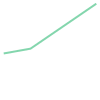

In [35]:
df_road.iloc[1][1]

-----calculate distance between road and point-----

In [70]:
def find_closest_road(point, roads_df):
    min_distance = float('inf')
    closest_road_id = None

    for idx, road in roads_df.iterrows():
        distance = point.distance(road['geometry'])
        if distance < min_distance:
            min_distance = distance
            closest_road_id = road['id']

    return closest_road_id

In [72]:
df_point['closest_road_id'] = df_point.apply(lambda row: find_closest_road(row['geometry'], df_road), axis=1)

In [75]:
df_point.drop('Closest_Road_ID', axis=1, inplace=True)

In [76]:
df_point

,id,geometry,closest_road_id
0,0,POINT (-74.00698 40.74748),119
1,1,POINT (-74.00722 40.74722),119
2,2,POINT (-74.00721 40.74697),120
3,3,POINT (-74.00722 40.74722),119
4,4,POINT (-74.00728 40.74667),120
...,...,...,...
2295,2295,POINT (-73.97976 40.71559),234
2296,2296,POINT (-73.97987 40.71361),30
2297,2297,POINT (-73.98387 40.72077),221
2298,2298,POINT (-73.97780 40.71833),199
